<a href="https://colab.research.google.com/github/visiont3lab/machine-learning-course/blob/main/classification/Project_Covid_Mask_Classifier_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Project Part3: Mask-NoMask Classifier

## Setup

In [14]:
# Scaricare il repositorio da github per avere accesso alle immagini
!git clone https://github.com/visiont3lab/covid-mask-classifier.git

fatal: destination path 'covid-mask-classifier' already exists and is not an empty directory.


## Data Augumentation

In [2]:
!rm -rf covid-mask-classifier/dataset-aug 
!mkdir -p covid-mask-classifier/dataset-aug/mask
!mkdir -p covid-mask-classifier/dataset-aug/no-mask

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
#https://keras.io/api/preprocessing/image/
name_mask = "mask" # Da fare sia per "mask" che per "no_mask"
name_nomask = "no-mask" # Da fare sia per "mask" che per "no_mask"
folder_path = "covid-mask-classifier/dataset/" # da quale cartella vogliamo leggere
folder_path_augmented_mask = "covid-mask-classifier/dataset-aug/" + name_mask
folder_path_augmented_nomask = "covid-mask-classifier/dataset-aug/" + name_nomask


IMG_SIZE = (64,64) # W, H
BATCH_SIZE = 250
def my_generator_mask(batch_size):
    SEED=42  
    images_generator = ImageDataGenerator(
            #rescale=1./255,
            brightness_range=(0.3, 1.0),
            vertical_flip=False,
            horizontal_flip=True,
            width_shift_range=0.12, #0.05,
            height_shift_range=0.12, #0.05,
            rotation_range=10, #2,
            zoom_range=0.15
            ).flow_from_directory(
                directory=folder_path,
                classes=[name_mask],
                target_size=IMG_SIZE,
                color_mode="rgb", # grayscale
                batch_size=batch_size,
                class_mode="categorical",
                shuffle=True,
                seed=SEED
            )
        #.flow(logo, logo, batch_size, seed=SEED)
    while True:
        images_aug_batch,_ = images_generator.next()
        yield images_aug_batch  

def my_generator_nomask(batch_size):
    SEED=42  
    images_generator = ImageDataGenerator(
            #rescale=1./255,
            brightness_range=(0.3, 1.0),
            vertical_flip=False,
            horizontal_flip=True,
            width_shift_range=0.12, #0.05,
            height_shift_range=0.12, #0.05,
            rotation_range=10, #2,
            zoom_range=0.15
            ).flow_from_directory(
                directory=folder_path,
                classes=[name_nomask],
                target_size=IMG_SIZE,
                color_mode="rgb", # grayscale
                batch_size=batch_size,
                class_mode="categorical",
                shuffle=True,
                seed=SEED
            )
        #.flow(logo, logo, batch_size, seed=SEED)
    while True:
        images_aug_batch,_ = images_generator.next()
        yield images_aug_batch  

for j in range(0,2):
    images_aug_mask_batch  = next(my_generator_mask(BATCH_SIZE))
    images_aug_nomask_batch  = next(my_generator_nomask(BATCH_SIZE))
    print(images_aug_mask_batch.shape)
    for i in range(0,images_aug_mask_batch.shape[0]):
        im_mask = cv2.cvtColor(images_aug_mask_batch[i,:,:,:], cv2.COLOR_BGR2RGB)
        im_nomask = cv2.cvtColor(images_aug_nomask_batch[i,:,:,:], cv2.COLOR_BGR2RGB)
        
        #im = cv2.cvtColor(images_aug_batch[i,:,:,:], cv2.COLOR_BGR2GRAY)
        cv2.imwrite(folder_path_augmented_mask + "/" + str(j) + "_" + str(i) + ".png", im_mask)
        cv2.imwrite(folder_path_augmented_nomask + "/" + str(j) + "_" + str(i) + ".png", im_nomask)
        
        # display image
        # im = cv2.resize(im_mask, (128,128)) 
        # im = np.uint8(im)
        # display(Image.fromarray(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)))
        

Found 499 images belonging to 1 classes.
Found 500 images belonging to 1 classes.
(250, 64, 64, 3)
Found 499 images belonging to 1 classes.
Found 500 images belonging to 1 classes.
(250, 64, 64, 3)


## Read Data

In [21]:
import os
import cv2
from PIL import Image
import numpy as np


# ritorna i nomi dei file contenuti nella cartella --> li ritorna come listaù
directory_path_mask = "/content/covid-mask-classifier/dataset-aug/mask"
directory_path_nomask = "/content/covid-mask-classifier/dataset-aug/no-mask"

# Dati finali
X = []
Y = []

def preprocess(filepath):

  # Read Image
  # im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED) # 0-255  unit8 -- unint16
  im = cv2.imread(filepath, cv2.IMREAD_COLOR) # 0-255  unit8 -- unint16
  
  # Conver to RGB
  im =cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

  # Conversione da RGB a Bianco e nero
  #im =cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

  # Colora un immagine in bianco e nero con una colormap
  #im = cv2.applyColorMap(im, cv2.COLORMAP_JET);

  # La colormap e BGR convertila a RGB per visualizzazione correta
  #im =cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

  # Resize Immagine
  im = cv2.resize(im, (64,64))
  #print(im.shape)

  return im

# Importante che le cartelle mask e no mask contengano lo stesso numero di immagini 
for name_mask, name_nomask in zip(os.listdir(directory_path_mask)[0:] , os.listdir(directory_path_nomask)[0:]):

  # Get filepath (path completo) dell' immagine
  filepath_mask = os.path.join(directory_path_mask,name_mask)
  filepath_nomask = os.path.join(directory_path_nomask,name_nomask)
  #filepath = directory_path + "/" + name

  im_mask = preprocess(filepath_mask)
  im_nomask = preprocess(filepath_nomask)

  xdata_mask = im_mask.reshape(-1)
  xdata_nomask = im_nomask.reshape(-1)
  
  X.append(xdata_mask)
  X.append(xdata_nomask)
  Y.append(0)
  Y.append(1)
  
  # numpy array --> Immagine PIL --> RGB
  #display(Image.fromarray(im_mask))
  #display(Image.fromarray(im_nomask))
  
  #break

X = np.array(X, dtype=np.float32)
Y = np.array(Y, dtype=np.float32)

## Training

In [22]:
from sklearn.model_selection import train_test_split
# Train e test data
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20,shuffle=True, random_state=25)

In [23]:
from sklearn.preprocessing import  MinMaxScaler  
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import precision_score,recall_score, accuracy_score, f1_score
from sklearn.externals import joblib
from sklearn.decomposition import PCA
import pickle

pipe = Pipeline([
    ("normalize", MinMaxScaler(feature_range=(0,1))), 
    ("pca", PCA(0.99)), 
    #("linear_svc", LinearSVC(C=10, loss="hinge")
    ("linear_svc", SVC(C=10,probability=True))
    #("svc", SVC(kernel="poly",degree=3,C=0.50, coef0=0.5)) # Kernel Trick
    #("svc", SVC(kernel="rbf",gamma=1,C=10)) # Kernel Trick # gamma=5, gamma=0.1, C=1000 , C=0.001
])

pipe.fit(X_train,y_train)

y_train_hat = pipe.predict(X_train)
y_test_hat = pipe.predict(X_test)

'''
tuned_parameters = [
          {'model__kernel': ['rbf'],  'model__C': [1,10, 100, 1000]},
          {'model__kernel': ['linear'], 'model__C': [1, 10, 100, 1000]},
          #{'model__kernel' : ['poly'], 'model__degree' : [2,3,4] ,'model__C': [1,10, 100, 1000]}
      ]

grid_search = RandomizedSearchCV(
  pipeline, tuned_parameters, scoring='f1_macro'
)

# Train
grid_search.fit(X_train,Y_train)

# Score
score = grid_search.best_estimator_.score(X,Y)
print("f1_weighted score : ", score)

save_model_joblib("model.pkl", grid_search.best_estimator_)
return grid_search.best_estimator_
'''

# Save 
with open("model.pkl", 'wb') as f:
    pickle.dump(pipe, f) 

In [24]:
precision = precision_score(y_test,y_test_hat)
recall = recall_score(y_test,y_test_hat)
accuracy = accuracy_score(y_test,y_test_hat)
f1 = f1_score(y_test,y_test_hat,average="weighted")
print("precision:", precision)
print("recall:", recall)
print("accuracy:", accuracy)
print("f1:", f1)


precision: 0.9714285714285714
recall: 1.0
accuracy: 0.985
f1: 0.984992115341293


In [19]:
from sklearn.metrics import confusion_matrix
import pandas as pd
# 0  mask  1 senza
cm_train = confusion_matrix(y_train,y_train_hat)
cm_test = confusion_matrix(y_test,y_test_hat)
df_train = pd.DataFrame(cm_train, columns=["Pred-Mask","Pred-No-Mask"], index=["Real-Mask","Real-No-Mask"])
df_test = pd.DataFrame(cm_test, columns=["Pred-Mask","Pred-No-Mask"], index=["Real-Mask","Real-No-Mask"])
print("TRAIN")
display(df_train)
print("TEST")
display(df_test)

TRAIN


,Pred-Mask,Pred-No-Mask
Real-Mask,401,0
Real-No-Mask,0,397


TEST


,Pred-Mask,Pred-No-Mask
Real-Mask,95,3
Real-No-Mask,0,102


| Risultato Esatto   | Risulato Predetto |  |
|------------|---------------------------|--|
|            |   Negativo | Positivo |
|Negativo    |    TN=97750     |    FP=150    |
|Positivo    |    FN=330      |    TP=1770    |



* Accuracy = $\frac{TP+TN}{TP+TN+FP+FN}$

* Recall = $\frac{TP}{TP+FN}$

* Precision = $\frac{TP}{TP+FP}$

* F1 = $\frac{2*Precision*recall}{Precision+Recall}$

## Test trained Model

In [20]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


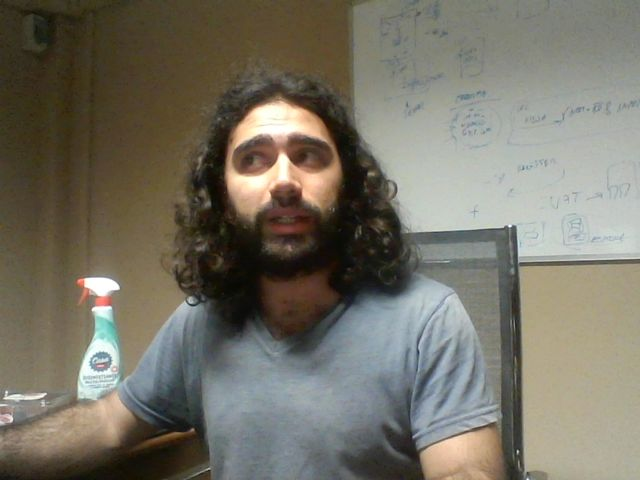

In [12]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

(1, 12288)


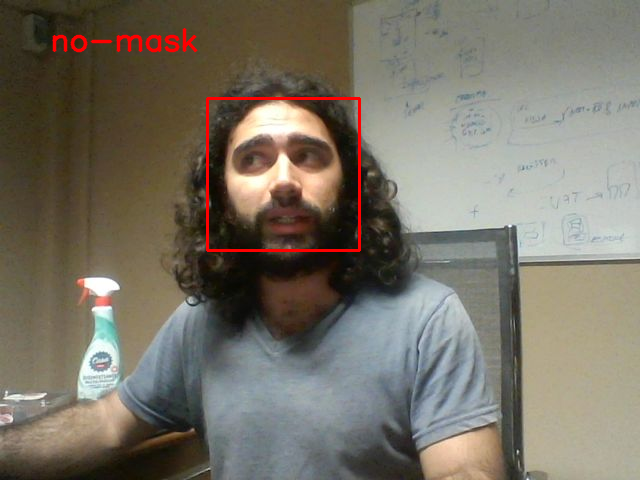

In [13]:
import cv2
from PIL import Image
import numpy as np
import pickle

def  findLargestBB(bbs):
  areas = [w*h for x,y,w,h in bbs]
  if not areas:
      return False, None
  else:
      i_biggest = np.argmax(areas) 
      biggest = bbs[i_biggest]
      return True, biggest

# Load face detector
model_face = cv2.CascadeClassifier('covid-mask-classifier/models/haarcascade/haarcascade_frontalface_default.xml')

# Load mask classifier
with open("model.pkl", 'rb') as f:
  model_mask = pickle.load(f)

class_names = ["mask", "no-mask"]
# Carichiamo l'immagina
frame = cv2.imread("photo.jpg")
# coversione immagine da BGR a RGB
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Trova tutte le facce nell'immagine
faces = model_face.detectMultiScale(frame,scaleFactor=1.05,minNeighbors=4, flags=cv2.CASCADE_DO_ROUGH_SEARCH | cv2.CASCADE_SCALE_IMAGE)

# Trova la faccia piu grande (area piu grande)
ret, facebig = findLargestBB(faces)

# Per ogni faccia fai qualcosa
if ret == True:

  # Extra coordiante of largest image
  x,y,w,h = facebig
  
  # Crop image 
  roi = frame[y:y+h,x:x+w]

  # -----
  # 64x64x3 --> messe su una linea
  roi = cv2.resize(roi,(64,64))
  inpX = roi.reshape(1,-1)
  print(inpX.shape)
  y_hat = model_mask.predict(inpX)
  cv2.putText(frame, class_names[int(y_hat[0])], (50, 50),  cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
  # -----

  # Disegna il quadrato
  cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)

  # In colab o jupyter
  im_roi = Image.fromarray(roi)
  im_full = Image.fromarray(frame)
  
  display(im_full)
  #display(im_roi)
